In [1]:
import numpy as np
x=np.array([[165,75],[170,85],[180,62],[169,70],[172,72]])
y=np.array(["overweight","overweight","normal","normal","normal"])
y_pred=np.array([173,75])

In [2]:
def euc_distance(x,y_pred):
    dis=np.sqrt(np.sum(np.square(x-y_pred)))
    return dis

In [3]:
l=[]
for i in range(len(x)):
    s=(y[i],euc_distance(x[i],y_pred))
    l.append(s)
print(l)

[('overweight', 8.0), ('overweight', 10.44030650891055), ('normal', 14.7648230602334), ('normal', 6.4031242374328485), ('normal', 3.1622776601683795)]


In [4]:
l.sort(key=lambda x:x[1])
l

[('normal', 3.1622776601683795),
 ('normal', 6.4031242374328485),
 ('overweight', 8.0),
 ('overweight', 10.44030650891055),
 ('normal', 14.7648230602334)]

In [7]:
# k=3
# sort=l[:k]
# sort

[('normal', 3.1622776601683795),
 ('normal', 6.4031242374328485),
 ('overweight', 8.0)]

In [8]:
# category_counts=Counter(x[0] for x in sort)
# msc=category_counts.most_common(1)
# msc

In [9]:
from collections import Counter
def most_common(l,k):
    new=l[:k]
    count=Counter([x[0] for x in new])
    msc=count.most_common(1)
    return msc[0][0]
most_common(l,3)

'normal'

In [10]:
def knn_classifier(x_train,y_train,x_test,k):
    y_predict=[]
    for x in x_test:
        l=[]
        for i in range(len(x_train)):
            s=(y_train[i],euc_distance(x,x_train[i]))
            l.append(s)
        freq=most_common(l,k)
        y_predict.append(freq)
    return np.array(y_predict)
x_train=np.array([[165,75],[170,85],[180,62],[169,70],[172,72]])
y_train=np.array(["overweight","overweight","normal","normal","normal"])
x_test=np.array([[173,75],[140,60]])
y_test=np.array(["overweight","normal"])
knn_classifier(x_train,y_train,x_test,5)

array(['normal', 'normal'], dtype='<U6')

In [16]:
# import ssl
# ssl._create_default_https_context=ssl._create_unverified_context
from ucimlrepo import fetch_ucirepo
iris=fetch_ucirepo(id=53)
# from sklearn.datasets import load_iris
# iris=load_iris(as_frame=True)

In [24]:
x=iris.data.features.values
y=iris.data.targets.values
print("first five elements of y: ",y[:5])
print("first five elements of x: ",x[:5])

first five elements of y:  [['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']]
first five elements of x:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y.ravel()) #ravel converts columns to rows
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
m_train,n=x_train.shape
m_test, n=x_test.shape
print(x_train.shape,y_train.shape)
print(x_test.shape)

(120, 4) (120,)
(30, 4)


In [27]:
k=3
y_predict=knn_classifier(x_train,y_train,x_test,k=3)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=accuracy_score(y_test,y_predict)
print(accuracy*100)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

33.33333333333333
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        10
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30

[[10  0  0]
 [ 9  0  0]
 [11  0  0]]


C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Text(0.5, 1.0, 'confusion Matrix')

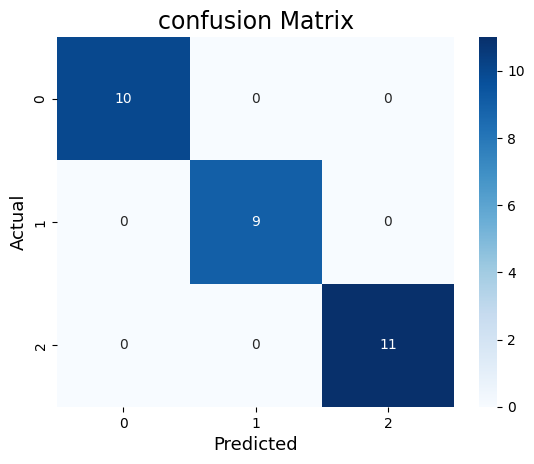

In [31]:
from sklearn. metrics import f1_score, precision_score, recall_score
import matplotlib. pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True ,fmt='g',cmap='Blues')
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title("confusion Matrix",fontsize=17)